# Developing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reservoir_simulator import ReservoirSim 
from oldrs import ReservoirSim as ORS

%load_ext autoreload
%autoreload 2   
%load_ext line_profiler

# Random number generator
rng = np.random.default_rng()

In [2]:
nx = ny = 50
perm_field = rng.normal(size=nx*ny).reshape(nx, ny) + 100
reservoir = ReservoirSim(perm_field)
pressure_history = reservoir.simulate()
np.allclose(ORS(nx=nx, ny=ny, perm_field=perm_field.ravel()).simulate(), pressure_history[1:, ...].reshape(10, -1))

True

In [3]:
%timeit reservoir.simulate()

35 ms ± 730 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%lprun -f ReservoirSim.simulate -f ReservoirSim.get_matrix reservoir.simulate()

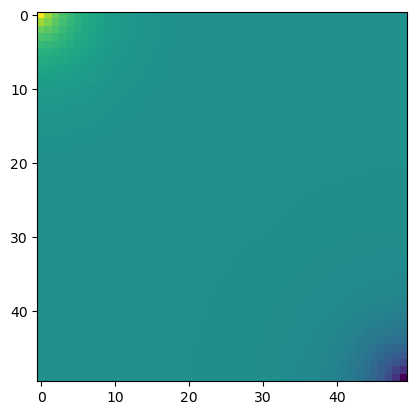

In [5]:
pressure_history = pressure_history.reshape((pressure_history.shape[0], nx,ny))
plt.imshow(pressure_history[-1,:,:])

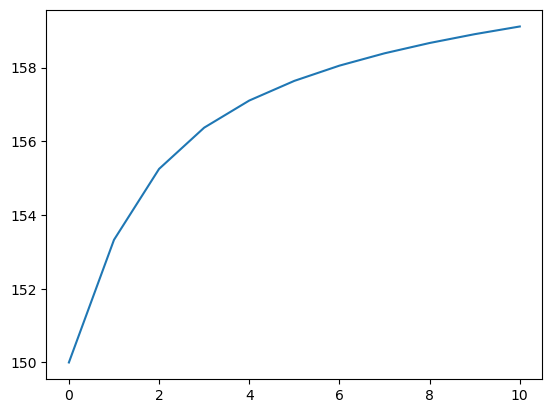

In [6]:
plt.plot(pressure_history[:,1,1])